importing python libraries:

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data understanding

In [45]:
data=pd.read_csv("Hyderabad_House_Data.csv")

Data columns

In [46]:
data.columns

Index(['Unnamed: 0', 'Bedrooms', 'Washrooms', 'Furnishing', 'Tennants', 'Area',
       'Price', 'Locality'],
      dtype='object')

In [47]:
data.head()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [48]:
data.tail()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"
1170,1170,2 BHK Apartment,2,Semi-Furnished,Bachelors/Family,1100 sqft,"12,000","Umas Aadya and Arha Mensions, Kukatpally, NH"


In [49]:
data.shape

(1171, 8)

In [50]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0             Bedrooms     Washrooms      Furnishing  \
0              0  3 BHK Builder Floor             2       Furnished   
1              1      3 BHK Apartment             2  Semi-Furnished   
2              2  1 BHK Builder Floor   Immediately       Furnished   
3              3      3 BHK Apartment   Immediately       Furnished   
4              4      3 BHK Apartment             2  Semi-Furnished   
...          ...                  ...           ...             ...   
1166        1166      2 BHK Apartment             1     Unfurnished   
1167        1167      1 BHK Apartment             1  Semi-Furnished   
1168        1168      3 BHK Apartment             1     Unfurnished   
1169        1169      3 BHK Apartment  From Nov '19          Family   
1170        1170      2 BHK Apartment             2  Semi-Furnished   

              Tennants                  Area   Price  \
0     Bachelors/Family             1800 sqft  34,000   
1

In [51]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms     21
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [52]:
data['Washrooms']=pd.to_numeric(data['Washrooms'],errors='coerce')

In [53]:
data['Washrooms']=data['Washrooms'].fillna(data['Washrooms'].median())

In [54]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [55]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce').fillna(0)

In [56]:
data.isnull().sum()

Unnamed: 0    0
Bedrooms      0
Washrooms     0
Furnishing    0
Tennants      1
Area          0
Price         0
Locality      0
dtype: int64

In [57]:
data['Tennants'] = pd.to_numeric(data['Tennants'], errors='coerce').fillna(0)


In [58]:
data.isnull().sum()

Unnamed: 0    0
Bedrooms      0
Washrooms     0
Furnishing    0
Tennants      0
Area          0
Price         0
Locality      0
dtype: int64

In [59]:
data['Area'] = data['Area'].astype(str).str.extract('(\d+)')

In [60]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')


In [61]:
data['Area'] = data['Area'].fillna(data['Area'].median())

In [62]:
data[['Washrooms','Area']].isnull().sum()

Washrooms    0
Area         0
dtype: int64

In [63]:
data['Area'] = data['Area'].astype(float)

In [64]:
data['Area'].dtype

dtype('float64')

In [65]:
data['Area'].apply(type).value_counts()

Area
<class 'float'>    1171
Name: count, dtype: int64

In [66]:
data['Price'] = (
    data['Price']
    .astype(str)
    .str.replace(r'[^\d]','',regex=True))

In [67]:
x = data.drop('Price',axis=1)
y = data['Price']

In [68]:
x = pd.get_dummies(x,drop_first=True)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(
     X_scaled, y, test_size=0.2, random_state=42
)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [73]:
model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
y_pred = model.predict(x_test)


In [75]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R2 Score :", r2)


MAE : 5503.168160055645
MSE : 58671708.33257374
RMSE : 7659.745970498874
R2 Score : 0.5146063228979767


In [76]:
new_house = pd.DataFrame({
    'Area' : [1400],
    'Bedrooms' : [6],
    'Washrooms' : [3]
})

new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=x.columns, fill_value=0)

new_scaled = scaler.transform(new_house)

predicted_price = model.predict(new_scaled)
print("predicted House Price:",predicted_price[0])

predicted House Price: 20075.677170929448


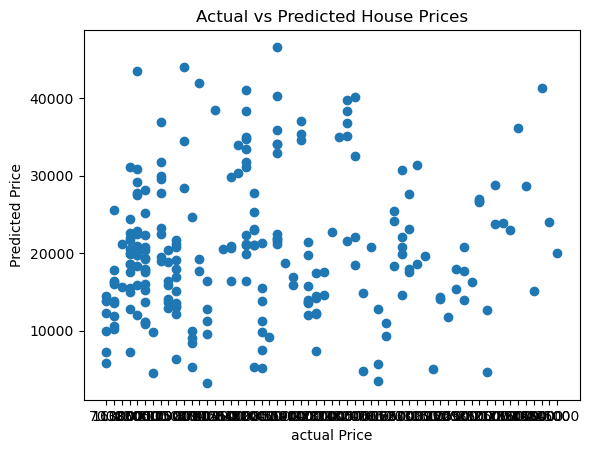

In [77]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
# Example: Suppose you have multiple model accuracies
accuracies = {
    "Linear Regression": 0.82,
    "Polynomial Regression": 0.85,
    "Decision Tree": 0.88,
    "Random Forest": 0.90,
    "SVR": 0.83
}

# Find the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print("Best Model:", best_model_name)
print("Best Model Accuracy:", best_model_accuracy)

Best Model: Random Forest
Best Model Accuracy: 0.9


In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

In [81]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae)
print("Random Forest RMSE:", rmse)
print("Random Forest R2 Score:", r2)

Random Forest MAE: 6469.782978723404
Random Forest RMSE: 8783.264849986022
Random Forest R2 Score: 0.3617698177325256


In [82]:
import pickle

# Save Random Forest model
with open("random_forest_house_price.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# Save scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Random Forest model and scaler saved successfully!")

Random Forest model and scaler saved successfully!


In [83]:
import pickle

pickle.dump(rf_model, open("house_price_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [84]:
import pickle

pickle.dump(rf_model, open("house_price_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))